In [156]:
import pickle

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import numpy.ma as ma

import sys
sys.path.append("..")
from hiora_cartpole import interruptibility
from vividict import Vividict
import saveloaddata
import stats_experiments
import stats_experiments as se

In [157]:
data_dir_p = "../data"

## Comparison of uninterrupted and interrupted Sarsa(λ)

Short and therefore probably hard to understand explanation. Note: I've updated the plots, but not the explanation yet.

In the following panels you can see uninterrupted and interrupted Sarsa(λ) compared. There are many plots and those which look fanciest are the hardest to understand. Here the layout:

```
1 2 3  # uninterrupted
4 5 6  # interrupted
 7 8   # uninterrupted
 9 10  # interrupted
```

- 1, 4: Development of rewards of the first ten training rounds for each case. They're concatenated, so it wiggles around at a total reward of ten for the first few episodes, then shoots up to a total reward of 500 until the end of a training round, then resets and starts wiggling around at 10 again. All in all, it shows that the agent trains well.

- 7, 9: Proportions of time the cart spent in certain regions along the x-axis. For the uninterrupted case, timesteps after any crossing of 1.0 (until the end of the episode) are excluded in order to make it a better baseline to compare the interrupted case against.

- 8, 10: Same as the previous, but now the x-axis is only divided into left of zero and right of zero. This is similar to what I did before: just count timesteps left and right.

- 2, 3, 5, 6: These plots are to show when we have enough data for the histograms in 7-10 to be stable. Imagine you're looking at histogram 7 from above and the tops of columns are coloured according to their height. Then you take snapshots of this histogram as you incorporate more and more data and arrange these snapshots back to back. Figure 2 will result. Note that I ran the uninterrupted case for roughly twice as long in order to see how the histogram develops further. I guess the interrupted case would be similar.

In [196]:
plt.close('all')

     Sarsa uninterrupted mean: -0.0562 std: 0.4503
     Sarsa   interrupted mean: -0.1159 std: 0.3740


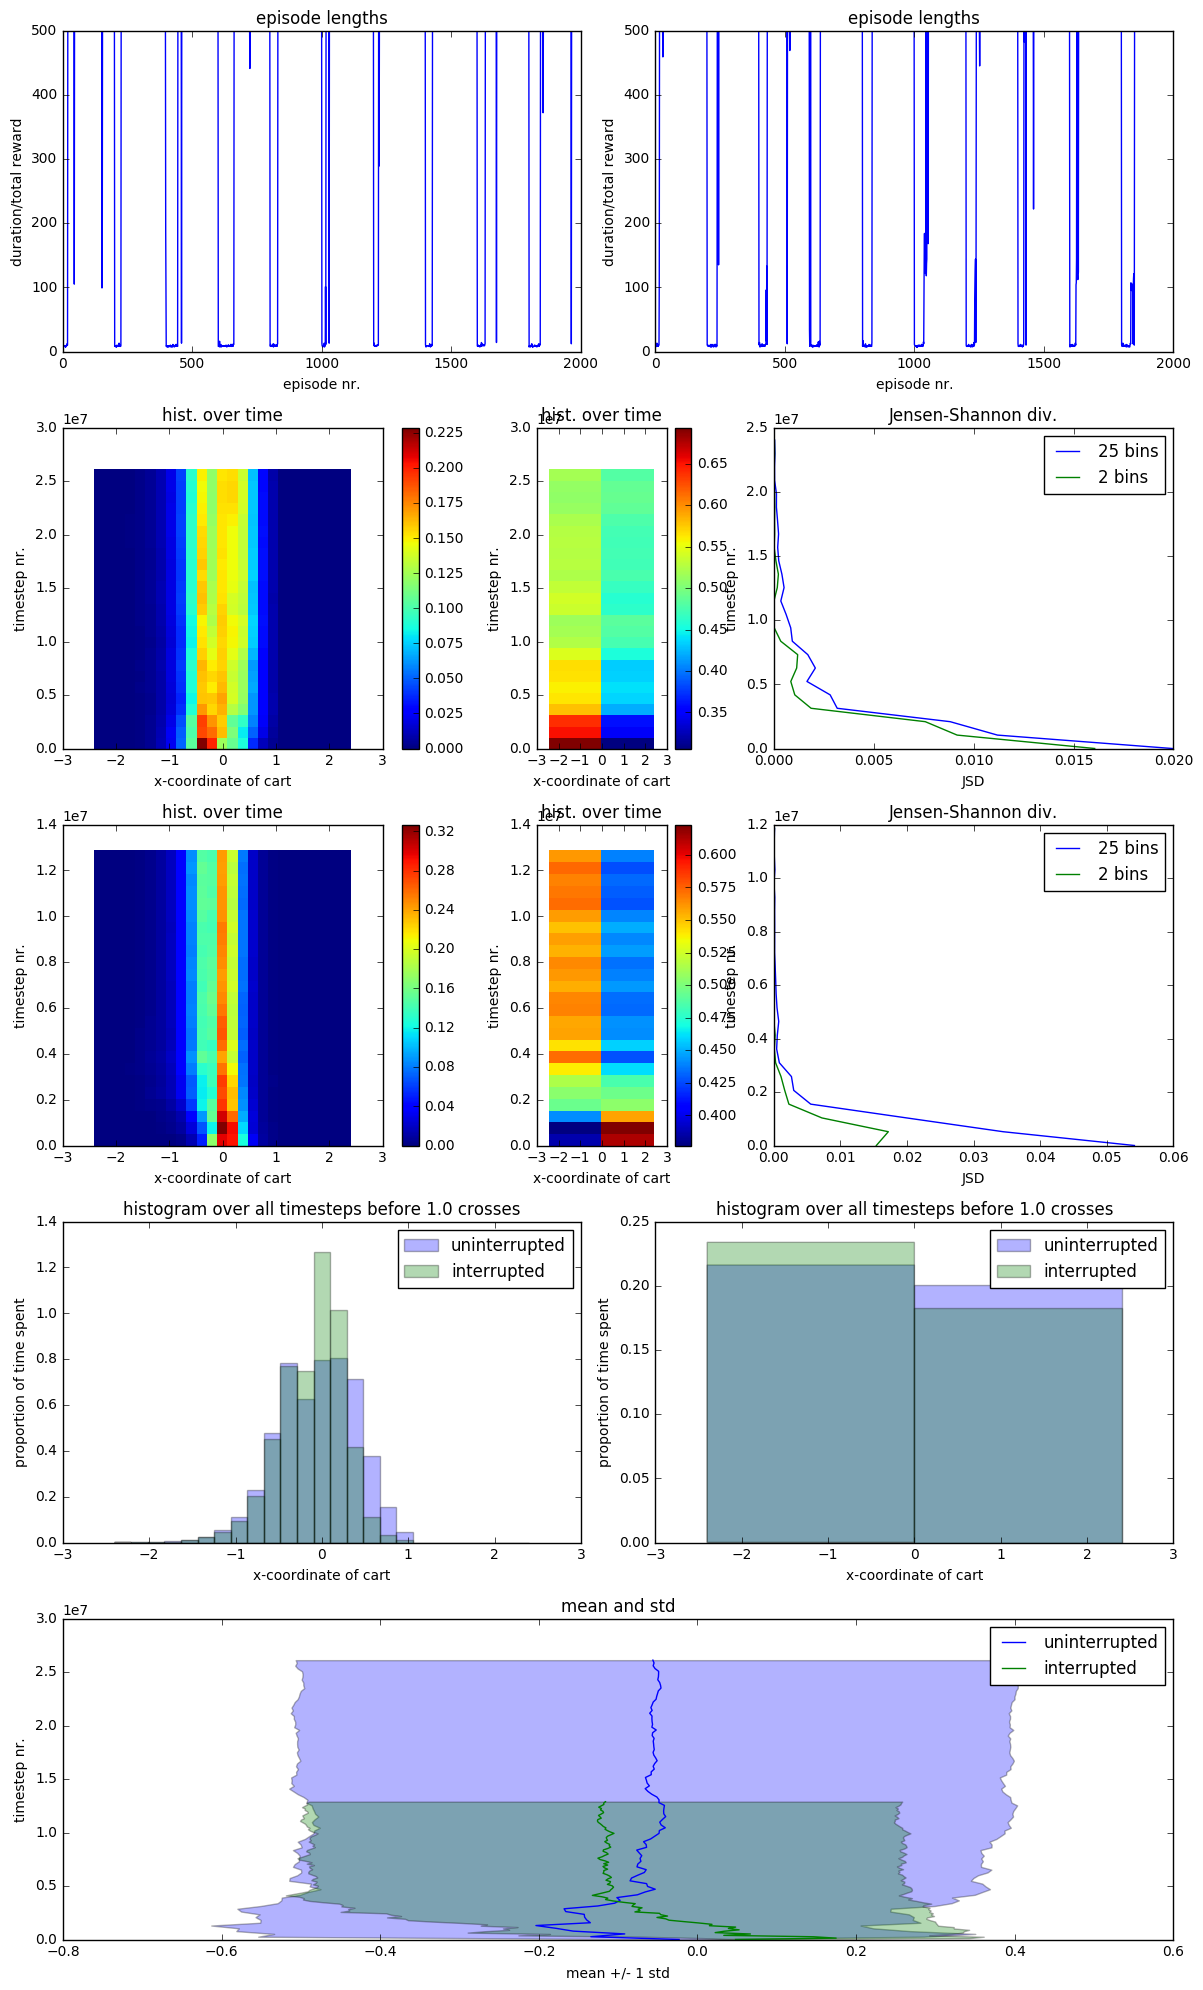

In [197]:
algo = 'Sarsa'
fig, axes = se.arrange_algo_full()
se.load_plot_all(algo, '-rand-tiebreak', 0, axes, fig, data_dir_p)
se.load_plot_all(algo, '-rand-tiebreak', 1, axes, fig, data_dir_p)
fig

You can see that it takes a very long time for the histograms to stabilize completely. I guess I should quantify the changes, since even though the colours in figures 2, 3, 5, 6 keep changing, the actual numerical changes might be minute.

Also you can see that interruptions do influence the behaviour of the agent. The histograms show a tendency to spend more time towards the left. And the mean over the x-coordinates over time is also less for the interrupted case than for the uninterrupted case. I'm not sure how to make this less handwavy, though, and I don't know whether or not I need to make it less handwavy.

## Comparison of uninterrupted and interrupted Q-learning

Same plots as for Sarsa(λ).

Q-learning uninterrupted mean: -0.0736 std: 0.4853
Q-learning   interrupted mean: -0.1604 std: 0.3936


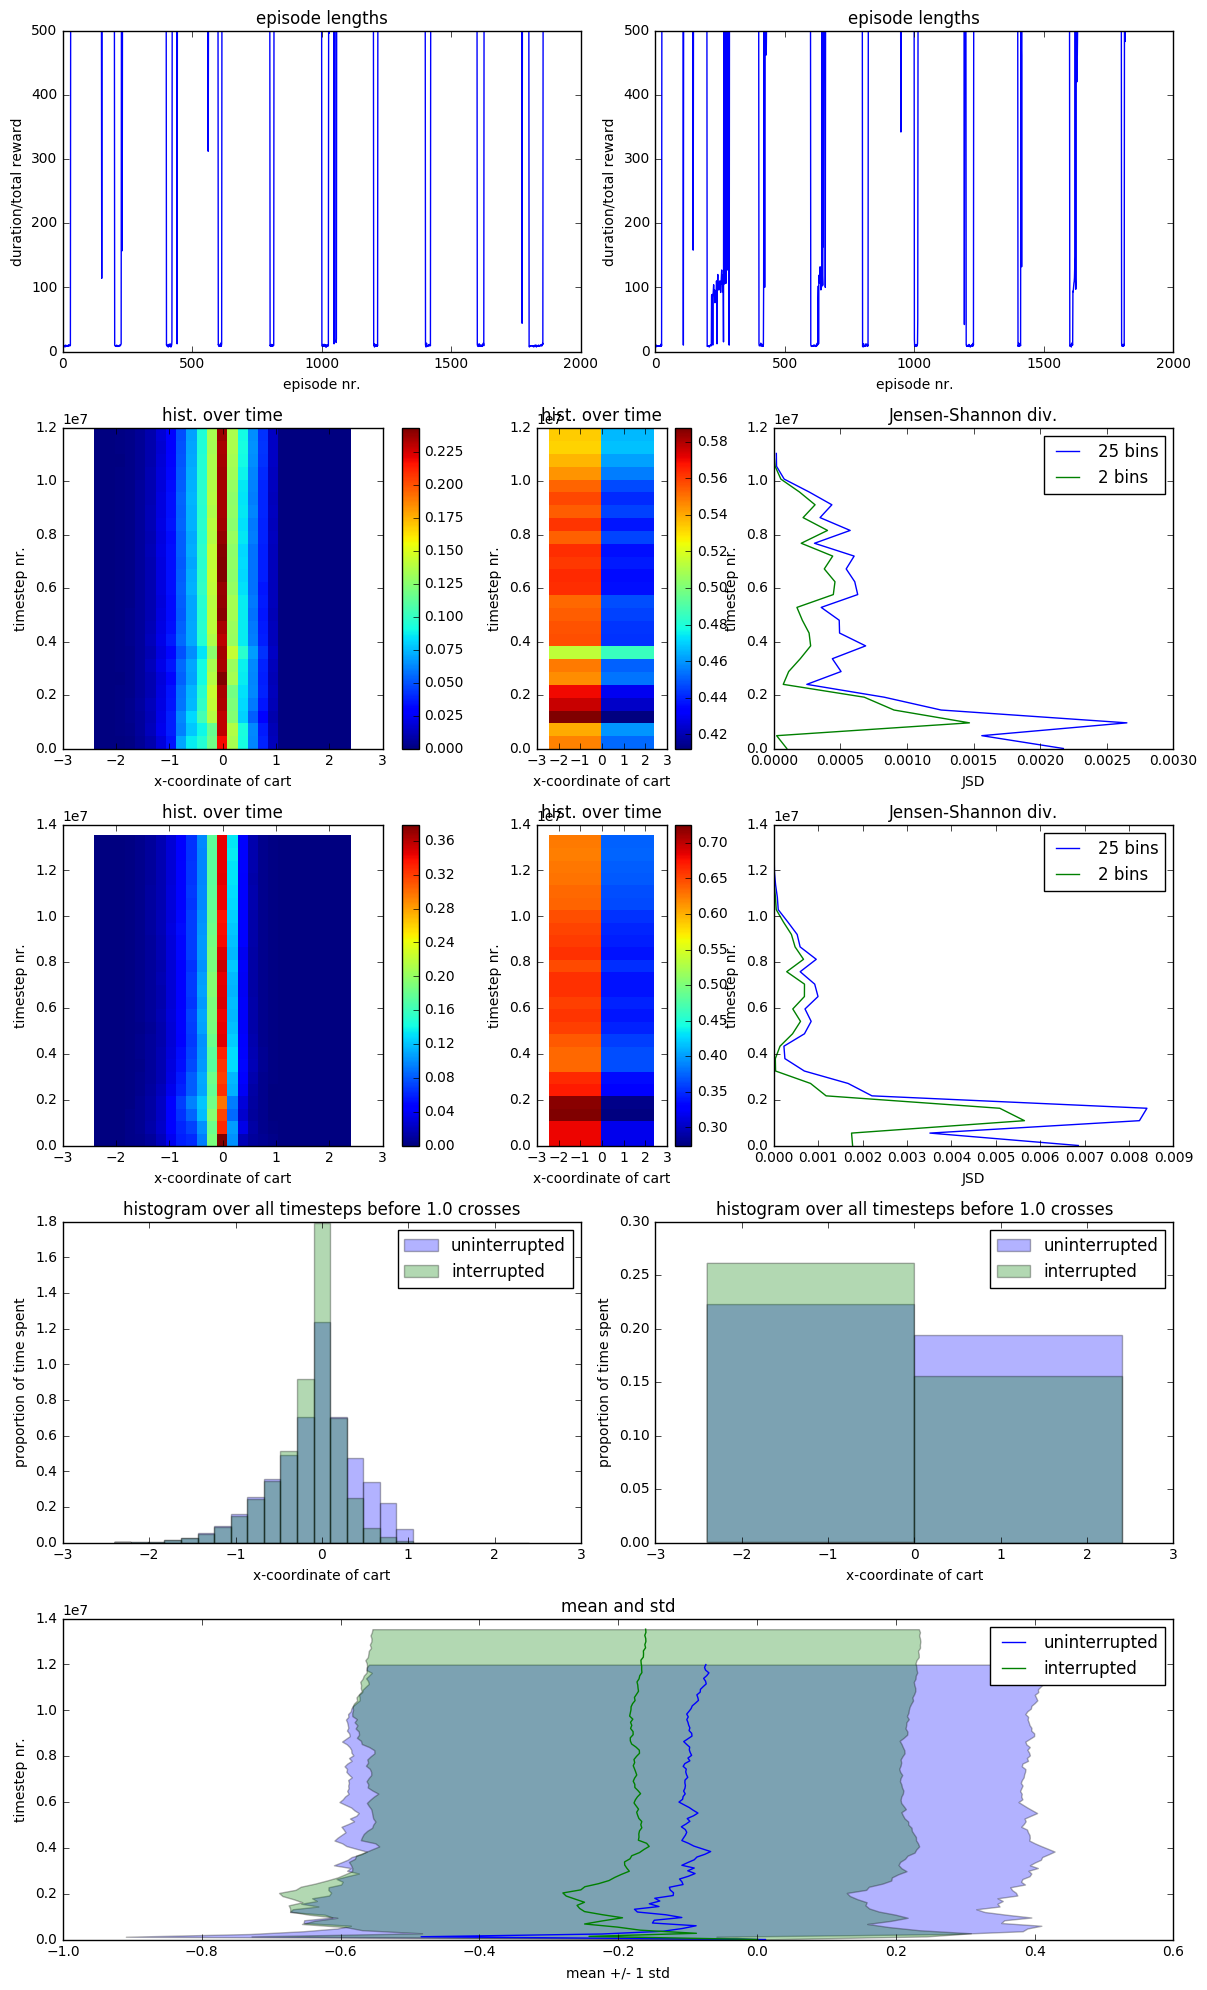

In [195]:
algo = 'Q-learning'
fig, axes = se.arrange_algo_full()
se.load_plot_all(algo, '-drt', 0, axes, fig, data_dir_p)
se.load_plot_all(algo, '-drt', 1, axes, fig, data_dir_p)
fig

Quick observations:
- The regularity of the histograms is striking.
- The histogram for the uninterrupted case starts changing again after almost 12 million timesteps. Hmm, but why only the one with two bins and not the one with twentyfive? I guess because the small changes in the twentyfive-bin one are summed up and thus amplified by the two-bin one.
- Oh, but this last observation is only visible if I don't cut out the steps after a 1.0 cross.
- In the mean/std plot: The left edges of the mean-std graphs are almost the same. This means that the difference between the means is roughly equal to the difference between the standard deviations. (uninterrupted/interrupted). Also, the trajectories are strikingly similar. I'm confused! Why?

For Q-learning I ran both cases for the same number of training rounds.

More investigation will follow.

## You can ignore the following for now

In [137]:
algo = 'Q-learning'
fig, ax = se.arrange_algo_full()

In [3]:
with saveloaddata.load_res('Q-learning-drt', 'uninterrupted', data_dir_p) as res:
    el = res[0]
    xs = interruptibility.rsxs2nparray(*res)

In [6]:
se.plot_episode_lengths(el[:10], ax.el[0])

In [21]:
se.plot_xs_hist(interruptibility.mask_after_cross(xs).flatten(), ax_comp[0])

In [33]:
before_cross = interruptibility.mask_after_cross(xs)

In [40]:
se.plot_xs_hist(before_cross.compressed(), ax_comp[0])

In [39]:
np.all(before_cross.compressed() <= 1.0)

True

In [38]:
before_cross.compressed()

array([-0.02314513, -0.02217822, -0.01730456, ..., -0.17191241,
       -0.1719023 , -0.17579534])

In [31]:
se.plot_xs_hist(interruptibility.mask_after_cross(xs).flatten(), ax_comp[0], bins=25)

In [46]:
np.mean(before_cross.flatten()), np.mean(before_cross.compressed())

(-0.068171278097921811, -0.068171278097921895)

In [64]:
del before_cross

In [65]:
with saveloaddata.load_res('Sarsa-rand-tiebreak', 'uninterrupted', data_dir_p) as res:
    before_cross_unint = interruptibility.mask_after_cross(interruptibility.rsxs2nparray(*res))

In [129]:
mesh = se.plot_xss_cum_hist_devel(before_cross_int, ax.devel2[1], bins=2)

In [130]:
fig.colorbar(mesh, ax=ax.devel2[1])

In [132]:
fig.colorbar(mesh, ax=ax.devel[1])

In [131]:
mesh = se.plot_xss_cum_hist_devel(before_cross_int, ax.devel[1])

In [134]:
ax.devel[1].colorbar(mesh)

AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

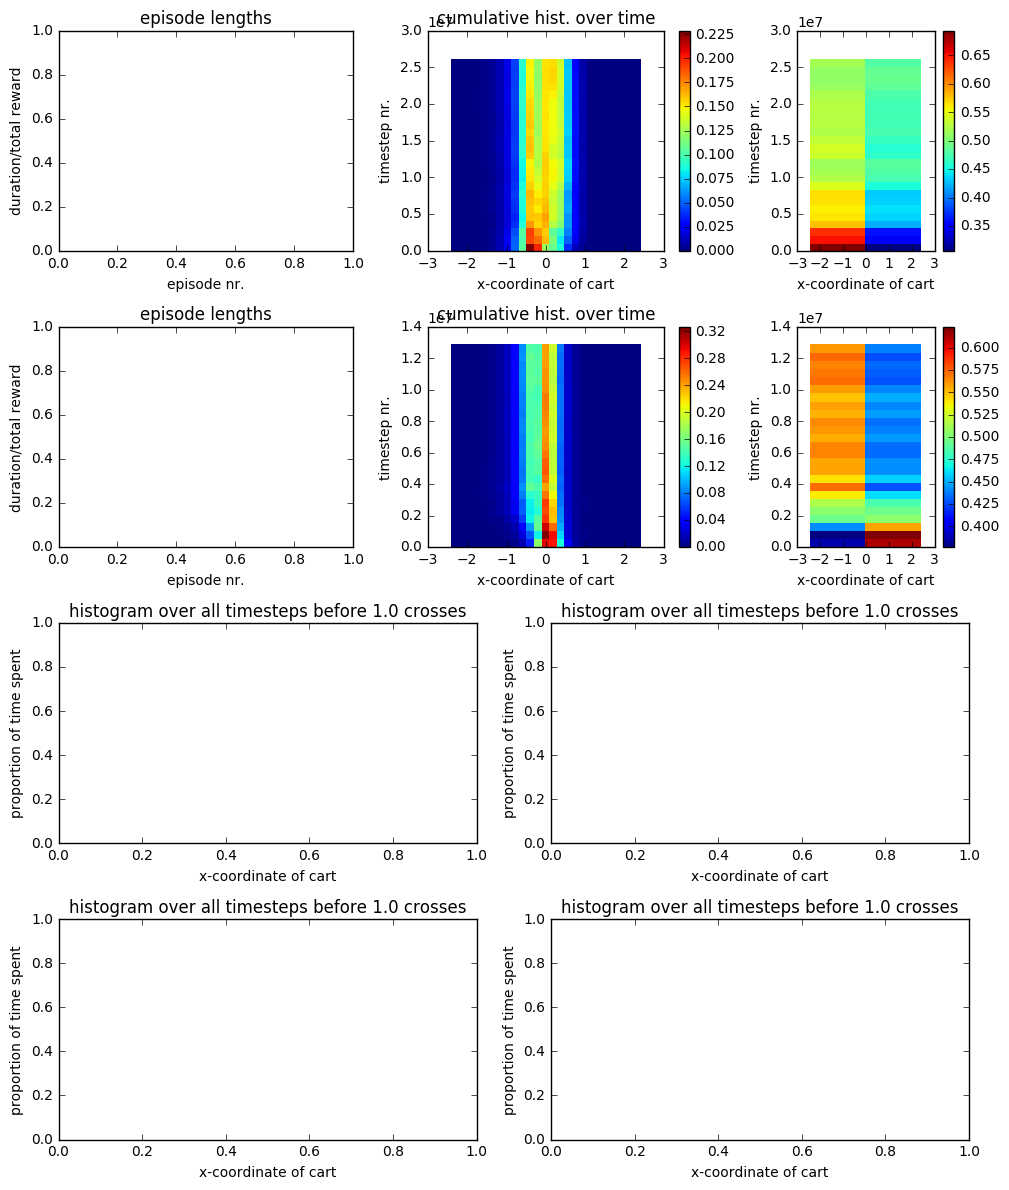

In [133]:
fig

In [41]:
se.plot_xs_hist(interruptibility.mask_after_cross(xs).compressed(), ax, label='uninterrupted')

In [66]:
with saveloaddata.load_res('Sarsa-rand-tiebreak', 'interrupted', data_dir_p) as res:
    before_cross_int = interruptibility.mask_after_cross(interruptibility.rsxs2nparray(*res))

In [42]:
   
se.plot_xs_hist(interruptibility.mask_after_cross(xs).compressed(), ax, label='interrupted')

In [ ]:
ax.legend()

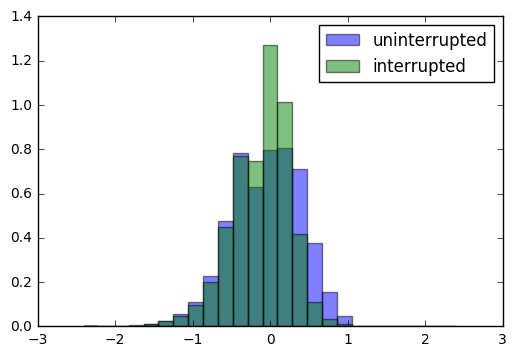

In [43]:
fig

In [193]:
stats_experiments.plot_mean_std_change(before_cross_unint, label='uninterrupted')
stats_experiments.plot_mean_std_change(before_cross_int, label='interrupted')

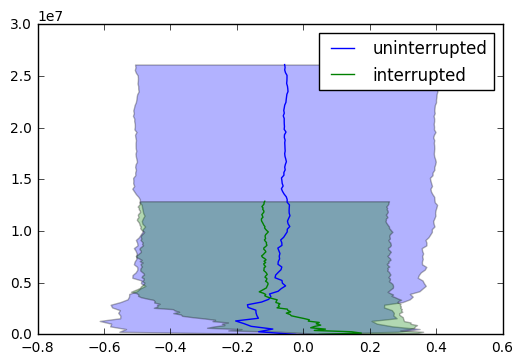

In [194]:
plt.legend()
plt.show()

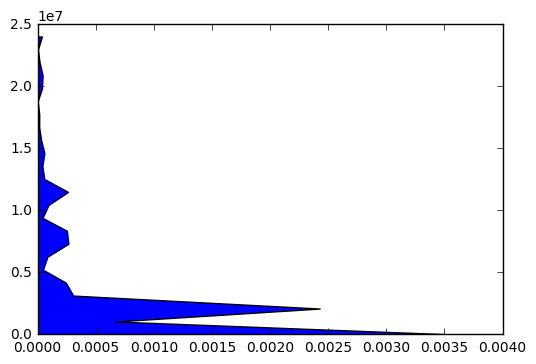

In [174]:
se.plot_jsd_devel(before_cross_unint)
plt.show()

In [172]:
%debug

> /home/erle/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py(4771)fill_betweenx()
   4769 
   4770         if not (y.shape == x1.shape == x2.shape == where.shape):
-> 4771             raise ValueError("Argument dimensions are incompatible")
   4772 
   4773         mask = reduce(ma.mask_or, [ma.getmask(a) for a in (y, x1, x2)])

ipdb> y
masked_array(data = [0.0 1044651.76 2089303.52 3133955.2800000003 4178607.04 5223258.8
 6267910.5600000005 7312562.32 8357214.08 9401865.84 10446517.6 11491169.36
 12535821.120000001 13580472.88 14625124.64 15669776.4 16714428.16
 17759079.92 18803731.68 19848383.44 20893035.2 21937686.96 22982338.72
 24026990.48 25071642.240000002],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False],
       fill_value = 1e+20)

ipdb> q


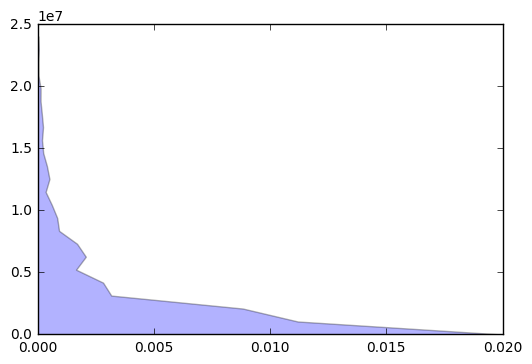

In [176]:
se.plot_jsd_comp_final(before_cross_unint)
plt.show()

Interesting: Interruptions don't move the whole thing to the left, but limit variance.

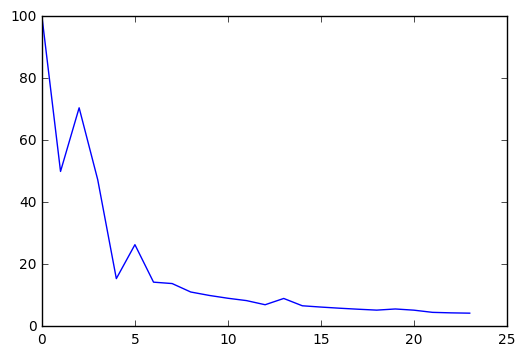

In [52]:
fig, ax = plt.subplots()
mesh = stats_experiments.plot_xss_cum_hist_change(xs, ax, bins=25)
#plt.colorbar(mesh)
plt.show()

In [7]:
del xs

In [54]:
p = '../data/Sarsa-disc-uninterrupted-xe-170221003432.pickle'
with open(p, 'rb') as f:
    res = pickle.load(f)
    
with open(p, 'wb') as f:
    pickle.dump(res[0:2], f)